# Regularization in Machine Learning — Ridge, Lasso, and Elastic Net

---

## 1. Why Regularization Is Needed

In machine learning, a very common problem is **overfitting**.

### Overfitting Definition

A model is said to be **overfitting** when:

- It performs very well on **training data**
- It performs poorly on **test / unseen data**

Formally:

$$
\text{Training Error} \ll \text{Test Error}
$$

This happens because the model becomes **too complex** and starts learning **noise** instead of the true pattern.

---

## 2. Where Regularization Fits in ML
##### arnav tomar Ra2411056030092

There are multiple techniques to fight overfitting:

- Bagging  
- Boosting  
- **Regularization**

Regularization is especially important in:

- Linear Regression  
- Logistic Regression  
- Perceptron / Neural Networks  

---

## 3. Core Idea of Regularization

### What Regularization Does

Regularization **adds a penalty term** to the loss function to **control model complexity**.

Original loss function (Linear Regression):

$$
J(\theta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Regularized loss function:

$$
J(\theta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \cdot \text{Penalty}
$$

Where:

- $\lambda$ is the **regularization strength**
- Higher $\lambda$ → simpler model
- Lower $\lambda$ → complex model

---

## 4. Why Penalizing Coefficients Helps

Large coefficients mean:

- Model reacts too strongly to small input changes
- High variance
- Overfitting

Regularization forces coefficients to stay **small**.

---

## 5. Ridge Regression (L2 Regularization)

### Ridge Loss Function

$$
J(\theta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \theta_j^2
$$

This is called **L2 regularization** because of squared terms.

---

### Effect of Ridge

- Shrinks coefficients
- Keeps all features
- Reduces model complexity smoothly
- Never makes coefficients exactly zero

---

### Geometric Interpretation

Penalty term:

$$
\sum \theta_j^2
$$

- Strongly penalizes large weights
- Prefers evenly distributed small weights

---

## 6. Lasso Regression (L1 Regularization)

### Lasso Loss Function

$$
J(\theta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\theta_j|
$$

This is called **L1 regularization**.

---

### Effect of Lasso

- Shrinks coefficients
- **Can make coefficients exactly zero**
- Performs **feature selection**
- Produces sparse models

---

### Key Difference from Ridge

| Ridge | Lasso |
|-----|------|
| Shrinks weights | Shrinks + removes |
| Keeps all features | Drops some features |
| No feature selection | Automatic feature selection |

---

## 7. Elastic Net Regularization

Elastic Net combines **Ridge + Lasso**.

### Elastic Net Loss Function

$$
J(\theta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
+ \lambda_1 \sum |\theta_j|
+ \lambda_2 \sum \theta_j^2
$$

---

### Why Elastic Net Is Used

- Handles multicollinearity better than Lasso
- Performs feature selection
- More stable than Lasso alone

---

## 8. Role of the Hyperparameter $\lambda$ (Alpha)

$$
\lambda = 0
$$

- No regularization
- Pure linear regression
- High risk of overfitting

---

$$
\lambda \rightarrow \infty
$$

- Very strong regularization
- Model becomes too simple
- Underfitting

---

### Summary

| $$\lambda$$ value | Model Behavior |
|------------------|---------------|
| Very small | Overfitting |
| Optimal | Best generalization |
| Very large | Underfitting |

---

## 9. Bias–Variance Perspective

As $\lambda$ increases:

- Bias ↑
- Variance ↓

As $\lambda$ decreases:

- Bias ↓
- Variance ↑

Goal:

$$
\text{Minimize } (\text{Bias}^2 + \text{Variance})
$$

---

## 10. Practical Example Insight

When tested on real datasets:

- Linear regression slightly overfits
- Ridge regression generalizes better
- Lasso improves performance on high-dimensional data

---

## 11. Visual Interpretation (From Lecture)

- $\lambda = 0$ → overfitting curve
- Moderate $\lambda$ → optimal fit
- Very large $\lambda$ → underfitting straight line

---

## 12. When to Use Which Regularization

### Use Ridge When:
- Many correlated features
- All features are useful

### Use Lasso When:
- Feature selection is needed
- Sparse solution preferred

### Use Elastic Net When:
- High dimensional data
- Correlated inputs
- Need balance of Ridge and Lasso

---

## 13. Exam-Ready One-Line Definitions

**Regularization**  
> Technique to reduce overfitting by adding penalty to the loss function.

**Ridge Regression**  
> L2 regularization that shrinks coefficients but keeps all features.

**Lasso Regression**  
> L1 regularization that can eliminate features by making coefficients zero.

**Elastic Net**  
> Combination of L1 and L2 regularization.

---

## 14. Final Takeaway

Regularization does **not** improve training accuracy.

It improves:

$$
\text{Performance on unseen data}
$$

That is the **real goal of machine learning**.

---


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

data=load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
X=data.data
y=data.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
from sklearn.linear_model import LinearRegression
L=LinearRegression()
L.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [ ]:
y_pred=L.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [ ]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=100000)
R.fit(X_train,y_train)


Ridge(alpha=100000)

In [ ]:
print(R.coef_)
print(R.intercept_)

[ 0.00260126  0.00057066  0.00776597  0.0060976   0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734598  0.00528629]
151.83287930791352


In [ ]:
y_pred1=R.predict(X_test)
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score -0.00042490200441935855
RMSE 70.25956272917782


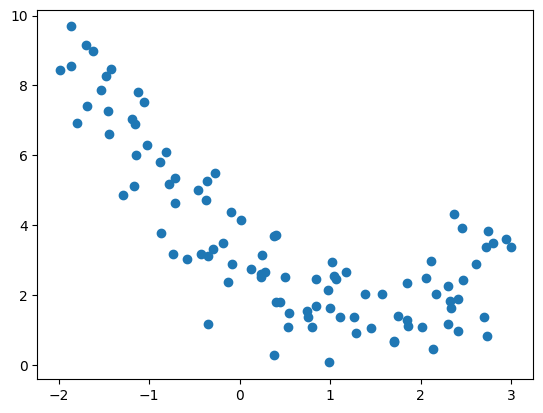

In [ ]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

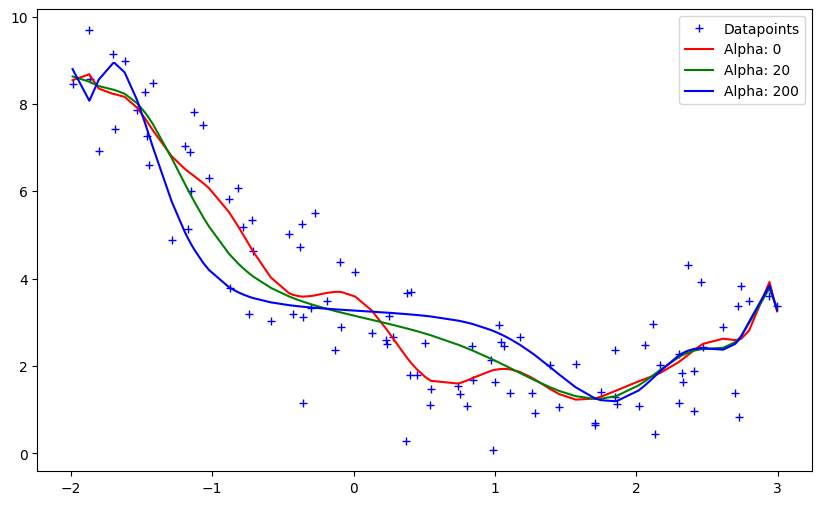

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()